In [1]:
from datasets import get_dataset_config_names
from datasets import load_dataset
from collections import defaultdict
from datasets import DatasetDict
import pandas as pd
from collections import Counter

C:\Users\BarkY\anaconda3\envs\pytorch-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Dataset

In [2]:
xtreme_subsets = get_dataset_config_names("xtreme")
print(f"XTREME has {len(xtreme_subsets)} configurations")

XTREME has 183 configurations


In [3]:
panx_subsets = [s for s in xtreme_subsets if s.startswith("PAN")]
panx_subsets[:3]

['PAN-X.af', 'PAN-X.ar', 'PAN-X.bg']

In [4]:
load_dataset("xtreme", name="PAN-X.de")

Found cached dataset xtreme (C:/Users/BarkY/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4)
100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 122.81it/s]


DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
})

In [5]:
langs = ["de", "fr", "it", "en"]
fracs = [0.629, 0.229, 0.084, 0.059]
# Return a DatasetDict if a key doesn't exist
panx_ch = defaultdict(DatasetDict)

for lang, frac in zip(langs, fracs):
    # Load monolingual corpus
    ds = load_dataset("xtreme", name=f"PAN-X.{lang}")
    # Shuffle and downsample each split according to spoken proportion
    for split in ds:
        panx_ch[lang][split] = (
            ds[split]
            .shuffle(seed=0)
            .select(range(int(frac * ds[split].num_rows)))
        )

Found cached dataset xtreme (C:/Users/BarkY/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4)
100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 746.58it/s]
Loading cached shuffled indices for dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-e5ddf09f1ae095ec.arrow
Loading cached shuffled indices for dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-25e7e2dd003d0fa6.arrow
Loading cached shuffled indices for dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-73a95bc0accfea8b.arrow
Found cached dataset xtreme (C:/Users/BarkY/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/29f5d57a

In [6]:
pd.DataFrame({lang: panx_ch[lang]["train"].num_rows for lang in langs}, index=["Number of training examples"])

,de,fr,it,en
Number of training examples,12580,4580,1680,1180


In [7]:
element = panx_ch["de"]["train"][0]
for key, value in element.items():
    print(f"{key}:{value}")

tokens:['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.']
ner_tags:[0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]
langs:['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de']


In [8]:
panx_ch["de"]["train"]

Dataset({
    features: ['tokens', 'ner_tags', 'langs'],
    num_rows: 12580
})

In [9]:
for key, value in panx_ch["de"]["train"].features.items():
    print(f"{key}:{value}")

tokens:Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
ner_tags:Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None)
langs:Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


In [10]:
tags = panx_ch["de"]["train"].features["ner_tags"].feature
tags

ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)

In [11]:
def create_tag_names(batch):
    return {"ner_tags_str": [tags.int2str(idx) for idx in batch["ner_tags"]]}

panx_de = panx_ch["de"].map(create_tag_names)

Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-aa23e79447eff40d.arrow
Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-f9488d5762d11017.arrow
Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-ddc8b7b55cfc03a8.arrow


In [12]:
de_example = panx_de["train"][0]
pd.DataFrame([de_example["tokens"], de_example["ner_tags_str"]], ['Tokens', 'Tags'])

,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O


In [13]:
split2freqs = defaultdict(Counter)
for split, dataset in panx_de.items():
    for row in dataset["ner_tags_str"]:
        for tag in row:
            if tag.startswith("B"):
                tag_type = tag.split("-")[1]
                split2freqs[split][tag_type] += 1

pd.DataFrame.from_dict(split2freqs, orient="index")

,LOC,ORG,PER
train,6186,5366,5810
validation,3172,2683,2893
test,3180,2573,3071


## Tokenization

In [14]:
from transformers import AutoTokenizer

bert_model_name = "bert-base-cased"
xlmr_model_name = "xlm-roberta-base"
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

In [15]:
text = "Jack Sparrow loves New York!"

# Word-Piece tokenizer
bert_tokens = bert_tokenizer(text).tokens()
bert_tokens

['[CLS]', 'Jack', 'Spa', '##rrow', 'loves', 'New', 'York', '!', '[SEP]']

In [16]:
# SentencePiece tokenizer
xlmr_tokens = xlmr_tokenizer(text).tokens()
xlmr_tokens

['<s>', '▁Jack', '▁Spar', 'row', '▁love', 's', '▁New', '▁York', '!', '</s>']

In [17]:
"".join(xlmr_tokens).replace(u"\u2581", " ")

'<s> Jack Sparrow loves New York!</s>'

## Custom Model for Token Classification

In [18]:
index2tag = {idx:tag for idx, tag in enumerate(tags.names)}
tag2index = {tag:idx for idx, tag in enumerate(tags.names)}

In [19]:
from transformers import AutoConfig
xlmr_config = AutoConfig.from_pretrained(xlmr_model_name,
                                         num_labels=tags.num_classes,
                                         id2label=index2tag, label2id=tag2index)

In [20]:
import torch
from XLMRobertaForTokenClassification import XLMRobertaForTokenClassification
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
xlmr_model = (XLMRobertaForTokenClassification
              .from_pretrained(xlmr_model_name, config=xlmr_config)
              .to(device))

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['roberta.embeddings.position_

In [21]:
input_ids = xlmr_tokenizer.encode(text, return_tensors="pt")
pd.DataFrame([xlmr_tokens, input_ids[0].numpy()], index=["Tokens", "Input IDs"])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Input IDs,0,21763,37456,15555,5161,7,2356,5753,38,2


In [22]:
outputs = xlmr_model(input_ids.to(device)).logits
predictions = torch.argmax(outputs, dim=-1)
print(f"Number of tokens in sequence: {len(xlmr_tokens)}")
print(f"Shape of outputs: {outputs.shape}")

Number of tokens in sequence: 10
Shape of outputs: torch.Size([1, 10, 7])


In [23]:
preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
pd.DataFrame([xlmr_tokens, preds], index=["Tokens", "Tags"])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Tags,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER


In [24]:
def tag_text(text, tags, model, tokenizer):
    # Get tokens with special characters
    tokens = tokenizer(text).tokens()
    # Encode the sequence into IDFs
    input_ids = tokenizer.encode(text, return_tensors="pt").to(device)
    # Get predictions as distribution over 7 possible classes
    outputs = model(input_ids)[0]
    # Take argmax to get most likely class per token
    predictions = torch.argmax(outputs, dim=-1)
    # Convert to DataFrame
    preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
    return pd.DataFrame([tokens, preds], index=["Tokens", "Tags"])

## Tokenizing Texts for NER

In [25]:
words, labels = de_example["tokens"], de_example["ner_tags"]
tokenized_input = xlmr_tokenizer(words, is_split_into_words=True)
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
pd.DataFrame([tokens], index=["Tokens"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>


In [26]:
words, labels

(['2.000',
  'Einwohnern',
  'an',
  'der',
  'Danziger',
  'Bucht',
  'in',
  'der',
  'polnischen',
  'Woiwodschaft',
  'Pommern',
  '.'],
 [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0])

In [27]:
word_ids = tokenized_input.word_ids()
pd.DataFrame([tokens, word_ids], index=["Tokens","Word IDs"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None


In [28]:
previous_word_idx = None
label_ids = []

for word_idx in word_ids:
    if word_idx is None or word_idx == previous_word_idx:
        label_ids.append(-100)
    else:
        label_ids.append(labels[word_idx])
    previous_word_idx = word_idx

In [29]:
labels = [index2tag[label_idx] if label_idx != -100 else "IGN" for label_idx in label_ids]
index = ["Tokens", "Word IDs", "Label IDs", "Labels"]
pd.DataFrame([tokens, word_ids, label_ids, labels], index=index)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None
Label IDs,-100,0,0,-100,0,0,5,-100,-100,6,...,5,-100,-100,-100,6,-100,-100,0,-100,-100
Labels,IGN,O,O,IGN,O,O,B-LOC,IGN,IGN,I-LOC,...,B-LOC,IGN,IGN,IGN,I-LOC,IGN,IGN,O,IGN,IGN


In [30]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = xlmr_tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)
    
    labels = []
    for idx, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=idx)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None or word_idx == previous_word_idx:
                label_ids.append(-100)
            else:
                label_ids.append(label[word_idx])
            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

def encode_panx_dataset(corpus):
    return corpus.map(tokenize_and_align_labels, batched=True, remove_columns=['langs', 'ner_tags', 'tokens'])

In [31]:
panx_de_encoded = encode_panx_dataset(panx_ch["de"])

Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-ec6dc4716788f002.arrow
Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-4de292f2a0674497.arrow


## Performance Measures

In [32]:
from seqeval.metrics import classification_report

y_true = [["O", "O", "O", "B-MISC", "I-MISC", "I-MISC", "O"],
["B-PER", "I-PER", "O"]]
y_pred = [["O", "O", "B-MISC", "I-MISC", "I-MISC", "I-MISC", "O"],
["B-PER", "I-PER", "O"]]
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



In [33]:
import numpy as np

def align_predictions(predictions, label_ids):
    preds = np.argmax(predictions, axis=2)
    batch_size, seq_len = preds.shape
    labels_list, preds_list = [], []
    
    for batch_idx in range(batch_size):
        example_labels, example_preds = [], []
        for seq_idx in range(seq_len):
            # Ignore label IDs = -100
            if label_ids[batch_idx, seq_idx] != -100:
                example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
                example_preds.append(index2tag[preds[batch_idx][seq_idx]])
        
        labels_list.append(example_labels)
        preds_list.append(example_preds)
    return preds_list, labels_list

## Fine-Tuning XLM-RoBERTa

In [34]:
from transformers import TrainingArguments

num_epochs = 3
batch_size = 24
logging_steps = len(panx_de_encoded["train"]) // batch_size
model_name = f"{xlmr_model_name}-finetuned-panx-de"
training_args = TrainingArguments(
    output_dir=model_name, log_level="error", num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size, evaluation_strategy="epoch",
    save_steps=1e6, weight_decay=0.01, disable_tqdm=False,
    logging_steps=logging_steps, push_to_hub=False)

In [35]:
#from huggingface_hub import notebook_login
#notebook_login()

In [36]:
from seqeval.metrics import f1_score

def compute_metrics(eval_pred):
    y_pred, y_true = align_predictions(eval_pred.predictions, eval_pred.label_ids)
    return {"f1": f1_score(y_true, y_pred)}

In [37]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

In [38]:
def model_init():
    return (XLMRobertaForTokenClassification
            .from_pretrained(xlmr_model_name, config=xlmr_config)
            .to(device))

In [39]:
from transformers import Trainer

trainer = Trainer(model_init=model_init, args=training_args,
                    data_collator=data_collator, compute_metrics=compute_metrics,
                    train_dataset=panx_de_encoded["train"],
                    eval_dataset=panx_de_encoded["validation"],
                    tokenizer=xlmr_tokenizer)

trainer.train()

C:\Users\BarkY\anaconda3\envs\pytorch-env\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,0.257900,0.163724,0.826229
2,0.130300,0.137620,0.847751
3,0.083400,0.136135,0.861482


TrainOutput(global_step=1575, training_loss=0.15712964281203254, metrics={'train_runtime': 150.1961, 'train_samples_per_second': 251.271, 'train_steps_per_second': 10.486, 'total_flos': 863012377186080.0, 'train_loss': 0.15712964281203254, 'epoch': 3.0})

In [40]:
text_de = "Jeff Dean ist ein Informatiker bei Google in Kalifornien"
tag_text(text_de, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁ist,▁ein,▁Informati,ker,▁bei,▁Google,▁in,▁Kaliforni,en,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC,I-LOC,O


In [41]:
text_de = "Jack Sparrow loves New York!"
tag_text(text_de, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,B-LOC,I-LOC,O,O


In [42]:
pd.DataFrame([xlmr_tokens, preds], index=["Tokens", "Tags"])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Tags,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER


## Error Analysis

In [115]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Convert dict of lists to lists of dicts suitable for data collator
    features = [dict(zip(batch, t)) for t in zip(*batch.values())]
    # Pad inputs and labels and put all tensors on device
    batch = data_collator(features)
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    labels = batch["labels"].to(device)
    with torch.no_grad():
        # Pass data through model
        output = trainer.model(input_ids, attention_mask)
        # logits.size: [batch_size, sequence_length, classes]
        # Predict class with largest logit value on classes axis
        predicted_label = torch.argmax(output.logits, axis=-1).cpu().numpy()
    # Calculate loss per token after flattening batch dimension with view
    loss = cross_entropy(output.logits.view(-1, 7), labels.view(-1), reduction="none")
    # Unflatten batch dimension and convert to numpy array
    loss = loss.view(len(input_ids), -1).cpu().numpy()
    
    return {"loss":loss, "predicted_label": predicted_label}

In [116]:
valid_set = panx_de_encoded["validation"]
valid_set = valid_set.map(forward_pass_with_label, batched=True, batch_size=32)
df = valid_set.to_pandas()

In [117]:
index2tag

,input_ids,attention_mask,labels,loss,predicted_label
0,"[0, 10699, 11, 15, 16104, 1388, 2]","[1, 1, 1, 1, 1, 1, 1]","[-100, 3, -100, 4, 4, 4, -100]","[0.0, 0.016142622, 0.0, 0.032865237, 0.0239712...","[4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
1,"[0, 56530, 25216, 30121, 152385, 19229, 83982,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, -100, -100, -100, -100, 3, -100, -10...","[0.0, 0.00018547245, 0.0, 0.0, 0.0, 0.0, 1.720...","[0, 0, 0, 0, 0, 0, 5, 6, 6, 6, 6, 6, 6, 6, 6, ..."
2,"[0, 159093, 165, 38506, 122, 153080, 29088, 57...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, 0, 0, 0, 3, -100, -100, 0, -100, 0, ...","[0.0, 0.00018869051, 0.00011503035, 0.00013076...","[0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 16459, 242, 5106, 6, 198715, 5106, 242, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, 0, 0, 5, -100, 0, 0, -100]","[0.0, 0.00022635281, 0.00016568719, 0.00015531...","[0, 0, 0, 0, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 11022, 2315, 7418, 1079, 8186, 57242, 97, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 0, 0, 0, 0, 0, -100, 0, 0, 0, 3, ...","[0.0, 0.00011443437, 0.00010918975, 0.00015639...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, ..."
...,...,...,...,...,...
6285,"[0, 10333, 599, 7418, 4180, 72, 3700, 542, 900...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 0, 0, -10...","[0.0, 0.00010585225, 9.190614e-05, 0.000109666...","[0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 0, 0, 0, 0, ..."
6286,"[0, 15497, 7, 91243, 15, 23924, 96220, 1388, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 5, -100, -100, 6, 6, 6, 6, -100]","[0.0, 0.009448809, 0.0, 0.0, 0.013153685, 0.01...","[6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ..."
6287,"[0, 1858, 566, 12241, 729, 4598, 89841, 68125,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 0, 0, -100, 0, -100, -100, 0, 0, ...","[0.0, 0.00013636613, 0.00011312322, 0.00027545...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6288,"[0, 132005, 11399, 7, 84974, 168, 34525, 84247...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, 0, -100, 0, 0, 5, 6, 0, 0, -100, -100]","[0.0, 0.00051401753, 0.009896263, 0.0, 0.00021...","[0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, ..."


In [122]:
index2tag[-100] = "IGN"
df["input_tokens"] = df["input_ids"].apply(lambda x: xlmr_tokenizer.convert_ids_to_tokens(x))
df["predicted_label"] = df["predicted_label"].apply(lambda x: [index2tag[i] for i in x])
df["labels"] = df["labels"].apply(lambda x: [index2tag[i] for i in x])
df["loss"] = df.apply(lambda x: x["loss"][:len(x["input_ids"])], axis=1)
df["predicted_label"] = df.apply(lambda x: x["predicted_label"][:len(x["input_ids"])], axis=1)

In [123]:
df.head(1)

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,"[0, 10699, 11, 15, 16104, 1388, 2]","[1, 1, 1, 1, 1, 1, 1]","[IGN, B-ORG, IGN, I-ORG, I-ORG, I-ORG, IGN]","[0.0, 0.016142622, 0.0, 0.032865237, 0.0239712...","[I-ORG, B-ORG, I-ORG, I-ORG, I-ORG, I-ORG, I-ORG]","[<s>, ▁Ham, a, ▁(, ▁Unternehmen, ▁), </s>]"


In [126]:
df_tokens = df.apply(pd.Series.explode)
df_tokens = df_tokens.query("labels != 'IGN'")
df_tokens["loss"] = df_tokens["loss"].astype(float).round(2)
df_tokens.head(7)

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,10699,1,B-ORG,0.02,B-ORG,▁Ham
0,15,1,I-ORG,0.03,I-ORG,▁(
0,16104,1,I-ORG,0.02,I-ORG,▁Unternehmen
0,1388,1,I-ORG,0.03,I-ORG,▁)
1,56530,1,O,0.00,O,▁WE
1,83982,1,B-ORG,1.72,B-LOC,▁Luz
1,10,1,I-ORG,1.93,I-LOC,▁a


In [140]:
(
    df_tokens.groupby("input_tokens")[["loss"]]
    .agg(["count", "mean", "sum"])
    .droplevel(level=0, axis=1) # Get rid of multi-level columns
    .sort_values(by="sum", ascending=False)
    .reset_index()
    .round(2)
    .head(10)
    .T
)

,0,1,2,3,4,5,6,7,8,9
input_tokens,▁,▁der,▁in,▁von,▁und,▁(,▁),▁/,▁'',▁A
count,6066,1388,989,808,1171,246,246,163,2898,125
mean,0.04,0.1,0.13,0.14,0.08,0.37,0.32,0.44,0.02,0.42
sum,219.51,135.51,130.97,116.75,97.24,91.8,77.95,72.51,69.32,53.06


In [144]:
(
    df_tokens.groupby("labels")[["loss"]]
    .agg(["count", "mean", "sum"])
    .droplevel(level=0, axis=1)
    .sort_values(by="mean", ascending=False)
    .reset_index()
    .round(2)
    .T
)

,0,1,2,3,4,5,6
labels,B-ORG,I-LOC,I-ORG,B-LOC,B-PER,I-PER,O
count,2683,1462,3820,3172,2893,4139,43648
mean,0.61,0.6,0.47,0.33,0.28,0.2,0.03
sum,1640.79,870.02,1786.32,1042.71,807.92,812.85,1383.08


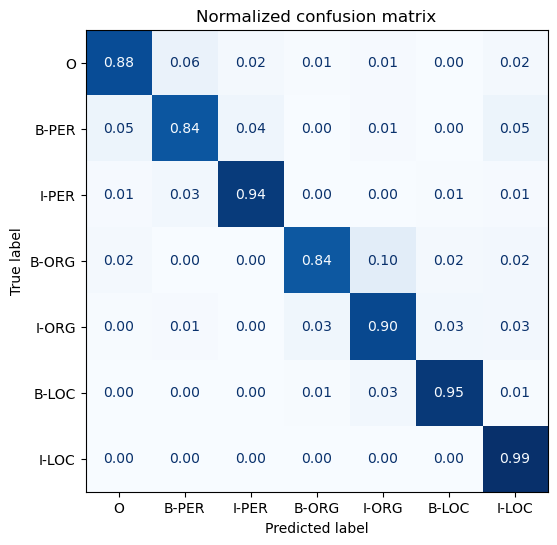

In [167]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

plot_confusion_matrix(df_tokens["labels"], df_tokens["predicted_label"], tags.names)

In [170]:
def get_samples(df):
    for _, row in df.iterrows():
        labels, preds, tokens, losses = [], [], [], []
        for i, mask in enumerate(row["attention_mask"]):
            if i not in {0, len(row["attention_mask"])}:
                labels.append(row["labels"][i])
                preds.append(row["predicted_label"][i])
                tokens.append(row["input_tokens"][i])
                losses.append(f"{row['loss'][i]:.2f}")
        df_tmp = pd.DataFrame({"tokens": tokens, "labels": labels, "preds": preds, "losses": losses}).T
        yield df_tmp

df["total_loss"] = df["loss"].apply(sum)
df_tmp = df.sort_values(by="total_loss", ascending=False).head(3)

for sample in get_samples(df_tmp):
    display(sample)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
tokens,▁',▁'',▁Τ,Κ,▁'',▁',▁',▁'',▁T,▁'',▁',ri,▁'',▁',k,▁'',▁',ala,</s>
labels,O,O,O,IGN,O,O,B-LOC,I-LOC,I-LOC,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,IGN
preds,O,O,B-ORG,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
losses,0.00,0.00,3.04,0.00,0.00,0.00,10.69,10.17,8.67,7.46,6.08,0.00,6.68,6.50,0.00,7.60,6.58,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
tokens,▁'',8,.,▁Juli,▁'',▁:,▁Protest,camp,▁auf,▁dem,▁Gelände,▁der,▁Republika,n,ischen,▁Gar,de,</s>
labels,B-ORG,IGN,IGN,I-ORG,I-ORG,I-ORG,I-ORG,IGN,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,IGN,IGN,I-ORG,IGN,IGN
preds,O,O,O,O,O,O,O,O,O,O,O,O,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,O
losses,8.90,0.00,0.00,3.64,8.81,8.65,5.84,0.00,7.75,8.50,7.56,6.12,5.81,0.00,0.00,0.01,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
tokens,▁United,▁Nations,▁Multi,dimensional,▁Integra,ted,▁Stabil,ization,▁Mission,▁in,▁the,▁Central,▁African,▁Republic,</s>
labels,B-PER,I-PER,I-PER,IGN,I-PER,IGN,I-PER,IGN,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,IGN
preds,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG
losses,5.99,5.16,5.58,0.00,5.63,0.00,5.38,0.00,4.97,5.42,5.61,5.30,5.28,5.25,0.00


In [172]:
df_tmp = df.loc[df["input_tokens"].apply(lambda x: u"\u2581(" in x)].head(2)
for sample in get_samples(df_tmp):
    display(sample)

,0,1,2,3,4,5
tokens,▁Ham,a,▁(,▁Unternehmen,▁),</s>
labels,B-ORG,IGN,I-ORG,I-ORG,I-ORG,IGN
preds,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG
losses,0.02,0.00,0.03,0.02,0.03,0.00


,0,1,2,3,4,5,6,7
tokens,▁Kesk,kül,a,▁(,▁Mart,na,▁),</s>
labels,B-LOC,IGN,IGN,I-LOC,I-LOC,IGN,I-LOC,IGN
preds,B-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC
losses,0.02,0.00,0.00,0.02,0.02,0.00,0.02,0.00


## Cross-Lingual Transfer

In [173]:
def get_f1_score(trainer, dataset):
    return trainer.predict(dataset).metrics["test_f1"]

In [174]:
f1_scores = defaultdict(dict)
f1_scores["de"]["de"] = get_f1_score(trainer, panx_de_encoded["test"])
print(f"F1-score of [de] model on [de] dataset: {f1_scores['de']['de']:.3f}")

F1-score of [de] model on [de] dataset: 0.866


In [175]:
text_fr = "Jeff Dean est informaticien chez Google en Californie"
tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁est,▁informatic,ien,▁chez,▁Google,▁en,▁Cali,for,nie,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,B-ORG,O,B-LOC,I-LOC,I-LOC,O


In [176]:
def evaluate_lang_performance(lang, trainer):
    panx_ds = encode_panx_dataset(panx_ch[lang])
    return get_f1_score(trainer, panx_ds["test"])

In [177]:
f1_scores["de"]["fr"] = evaluate_lang_performance("fr", trainer)
print(f"F1-score of [de] model on [fr] dataset: {f1_scores['de']['fr']:.3f}")

F1-score of [de] model on [fr] dataset: 0.699


In [178]:
f1_scores["de"]["it"] = evaluate_lang_performance("it", trainer)
print(f"F1-score of [de] model on [it] dataset: {f1_scores['de']['it']:.3f}")

F1-score of [de] model on [it] dataset: 0.643


In [179]:
f1_scores["de"]["en"] = evaluate_lang_performance("en", trainer)
print(f"F1-score of [de] model on [en] dataset: {f1_scores['de']['en']:.3f}")

F1-score of [de] model on [en] dataset: 0.605


## When Does Zero-Shot Transfer Make Sense?

In [180]:
def train_on_subset(dataset, num_samples):
    train_ds = dataset["train"].shuffle(seed=42).select(range(num_samples))
    valid_ds = dataset["validation"]
    test_ds = dataset["test"]
    training_args.logging_steps = len(train_ds) // batch_size
    
    trainer = Trainer(model_init=model_init, args=training_args,
                      data_collator=data_collator, compute_metrics=compute_metrics,
                      train_dataset=train_ds, eval_dataset=valid_ds, tokenizer=xlmr_tokenizer)
    trainer.train()
    f1_score = get_f1_score(trainer, test_ds)
    return pd.DataFrame.from_dict({"num_samples": [len(train_ds)], "f1_score": [f1_score]})

In [181]:
panx_fr_encoded = encode_panx_dataset(panx_ch["fr"])
metrics_df = train_on_subset(panx_fr_encoded, 250)
metrics_df

Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.fr\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-59650f03c56c527b.arrow
Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.fr\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-ac03bbee58fd31c8.arrow
C:\Users\BarkY\anaconda3\envs\pytorch-env\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,1.754200,1.283754,0.083426
2,1.237500,1.072100,0.200559
3,1.043300,0.994243,0.240219


,num_samples,f1_score
0,250,0.232023


In [182]:
for num_samples in [500, 1000, 2000, 4000]:
    metrics_df = metrics_df.append(
        train_on_subset(panx_fr_encoded, num_samples), ignore_index=True)

Loading cached shuffled indices for dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.fr\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-e290ae1b46c7b1c9.arrow
C:\Users\BarkY\anaconda3\envs\pytorch-env\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,1.508300,1.042059,0.167680
2,0.903900,0.699839,0.566350
3,0.594300,0.580670,0.658715


C:\Users\BarkY\AppData\Local\Temp\ipykernel_8844\334256818.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(
Loading cached shuffled indices for dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.fr\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-e290ae1b46c7b1c9.arrow
C:\Users\BarkY\anaconda3\envs\pytorch-env\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,1.153300,0.553674,0.601704
2,0.452000,0.395561,0.745143
3,0.283200,0.370079,0.772005


C:\Users\BarkY\AppData\Local\Temp\ipykernel_8844\334256818.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(
Loading cached shuffled indices for dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.fr\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-e290ae1b46c7b1c9.arrow
C:\Users\BarkY\anaconda3\envs\pytorch-env\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,0.815300,0.438548,0.693443
2,0.336200,0.370484,0.765957
3,0.223400,0.332252,0.804979


C:\Users\BarkY\AppData\Local\Temp\ipykernel_8844\334256818.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(
Loading cached shuffled indices for dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.fr\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-e290ae1b46c7b1c9.arrow
C:\Users\BarkY\anaconda3\envs\pytorch-env\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,0.624300,0.335489,0.774416
2,0.265900,0.276867,0.813548
3,0.170100,0.280087,0.834284


C:\Users\BarkY\AppData\Local\Temp\ipykernel_8844\334256818.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(


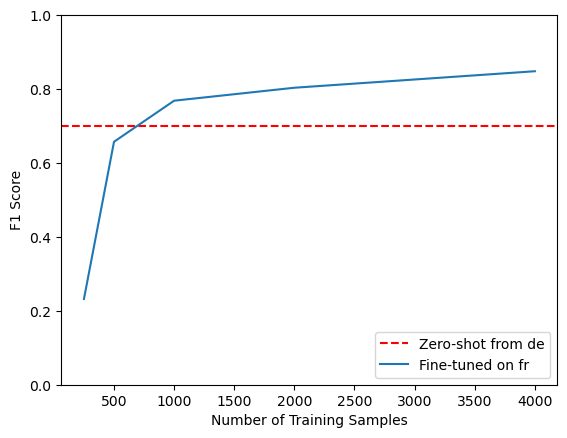

In [183]:
fig, ax = plt.subplots()
ax.axhline(f1_scores["de"]["fr"], ls="--", color="r")
metrics_df.set_index("num_samples").plot(ax=ax)
plt.legend(["Zero-shot from de", "Fine-tuned on fr"], loc="lower right")
plt.ylim((0, 1))
plt.xlabel("Number of Training Samples")
plt.ylabel("F1 Score")
plt.show()

## Fine-Tuning on Multiple Languages at Once

In [184]:
from datasets import concatenate_datasets

def concatenate_splits(corpora):
    multi_corpus = DatasetDict()
    for split in corpora[0].keys():
        multi_corpus[split] = concatenate_datasets(
        [corpus[split] for corpus in corpora]).shuffle(seed=42)
    return multi_corpus

In [185]:
panx_de_fr_encoded = concatenate_splits([panx_de_encoded, panx_fr_encoded])

training_args.logging_steps = len(panx_de_fr_encoded["train"]) // batch_size
training_args.push_to_hub = False
training_args.output_dir = "xlm-roberta-base-finetuned-panx-de-fr"

trainer = Trainer(model_init=model_init, args=training_args,
    data_collator=data_collator, compute_metrics=compute_metrics,
    tokenizer=xlmr_tokenizer, train_dataset=panx_de_fr_encoded["train"],
    eval_dataset=panx_de_fr_encoded["validation"])

trainer.train()

C:\Users\BarkY\anaconda3\envs\pytorch-env\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,0.289100,0.188165,0.829836
2,0.147600,0.160717,0.843625
3,0.092900,0.161936,0.859293


TrainOutput(global_step=2145, training_loss=0.1764984415405558, metrics={'train_runtime': 202.3786, 'train_samples_per_second': 254.375, 'train_steps_per_second': 10.599, 'total_flos': 1140291491923584.0, 'train_loss': 0.1764984415405558, 'epoch': 3.0})

In [186]:
for lang in langs:
    f1 = evaluate_lang_performance(lang, trainer)
    print(f"F1-score of [de-fr] model on [{lang}] dataset: {f1:.3f}")

Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.fr\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-9a02a40664b7d402.arrow
Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.fr\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-59650f03c56c527b.arrow
Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.fr\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-ac03bbee58fd31c8.arrow


F1-score of [de-fr] model on [de] dataset: 0.864


Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.it\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-548fb93d6b7ef381.arrow
Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.it\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-0be4f9e6f3db0586.arrow
Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.it\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-38f807d735df3da7.arrow


F1-score of [de-fr] model on [fr] dataset: 0.858


Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.en\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-5f6ad1c78147e79a.arrow
Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.en\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-9f2fa5f83d6dffd0.arrow
Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.en\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-f0d2469b578218ed.arrow


F1-score of [de-fr] model on [it] dataset: 0.795


F1-score of [de-fr] model on [en] dataset: 0.670


In [187]:
corpora = [panx_de_encoded]

# Exclude German from iteration
for lang in langs[1:]:
    training_args.output_dir = f"xlm-roberta-base-finetuned-panx-{lang}"
    # Fine-tune on monolingual corpus
    ds_encoded = encode_panx_dataset(panx_ch[lang])
    metrics = train_on_subset(ds_encoded, ds_encoded["train"].num_rows)
    # Collect F1-scores in common dict
    f1_scores[lang][lang] = metrics["f1_score"][0]
    # Add monolingual corpus to list of corpora to concatenate
    corpora.append(ds_encoded)

Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.fr\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-9a02a40664b7d402.arrow
Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.fr\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-59650f03c56c527b.arrow
Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.fr\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-ac03bbee58fd31c8.arrow
Loading cached shuffled indices for dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.fr\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-e290ae1b46c7b1c9.arrow
C:\Users\BarkY\anaconda3\envs\pytorch-env\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch 

Epoch,Training Loss,Validation Loss,F1
1,0.580500,0.319104,0.796813
2,0.264000,0.282684,0.820881
3,0.175500,0.276927,0.836920


Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.it\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-548fb93d6b7ef381.arrow
Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.it\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-0be4f9e6f3db0586.arrow
Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.it\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-38f807d735df3da7.arrow
C:\Users\BarkY\anaconda3\envs\pytorch-env\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,0.820000,0.329100,0.740681
2,0.306800,0.275304,0.791548
3,0.203000,0.245769,0.815297


Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.en\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-5f6ad1c78147e79a.arrow
Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.en\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-9f2fa5f83d6dffd0.arrow
Loading cached processed dataset at C:\Users\BarkY\.cache\huggingface\datasets\xtreme\PAN-X.en\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-f0d2469b578218ed.arrow
C:\Users\BarkY\anaconda3\envs\pytorch-env\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,1.103300,0.609385,0.490236
2,0.505700,0.454206,0.613377
3,0.374800,0.394618,0.695361


In [188]:
corpora_encoded = concatenate_splits(corpora)

In [189]:
training_args.logging_steps = len(corpora_encoded["train"]) // batch_size
training_args.output_dir = "xlm-roberta-base-finetuned-panx-all"
trainer = Trainer(model_init=model_init, args=training_args,
    data_collator=data_collator, compute_metrics=compute_metrics,
    tokenizer=xlmr_tokenizer, train_dataset=corpora_encoded["train"],
    eval_dataset=corpora_encoded["validation"])
trainer.train()

C:\Users\BarkY\anaconda3\envs\pytorch-env\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,0.297100,0.188820,0.804987
2,0.155100,0.174434,0.844611
3,0.100500,0.179998,0.853699


TrainOutput(global_step=2505, training_loss=0.18413193543514092, metrics={'train_runtime': 235.3301, 'train_samples_per_second': 255.216, 'train_steps_per_second': 10.645, 'total_flos': 1312991477886144.0, 'train_loss': 0.18413193543514092, 'epoch': 3.0})

In [190]:
for idx, lang in enumerate(langs):
    f1_scores["all"][lang] = get_f1_score(trainer, corpora[idx]["test"])
    
scores_data = {"de": f1_scores["de"],
               "each": {lang: f1_scores[lang][lang] for lang in langs},
               "all": f1_scores["all"]}
f1_scores_df = pd.DataFrame(scores_data).T.round(4)
f1_scores_df.rename_axis(index="Fine-tune on", columns="Evaluated on",
                         inplace=True)
f1_scores_df

Evaluated on,de,fr,it,en
Fine-tune on,,,,
de,0.8657,0.6995,0.6433,0.6053
each,0.8657,0.8408,0.8094,0.7048
all,0.8643,0.8699,0.8581,0.7503
